# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
renda = pd.read_csv('previsao_de_renda.csv', index_col= None)
renda.drop('Unnamed: 0', axis= 1)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [3]:
renda.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

**Desconsiderando as colunas 'Unnamed: 0' e 'index', as únicas com valores numéricos são 'idade', 'tempo_emprego', 'qt_pessoas_residencia' e 'renda', logo, essas serão as coluans analisadas.**

In [4]:
#primeiramente iremos criar um dataframe somente com as colunas numericas
renda_num = renda[['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
renda_num

,idade,tempo_emprego,qt_pessoas_residencia,renda
0,36,3.575342,3.0,3369.24
1,42,0.860274,2.0,6096.14
2,31,8.065753,4.0,5658.98
3,50,1.208219,2.0,7246.69
4,52,13.873973,2.0,4017.37
...,...,...,...,...
14995,37,2.046575,3.0,1193.29
14996,30,12.079452,3.0,2519.18
14997,40,2.161644,2.0,1586.85
14998,47,3.295890,2.0,6975.39


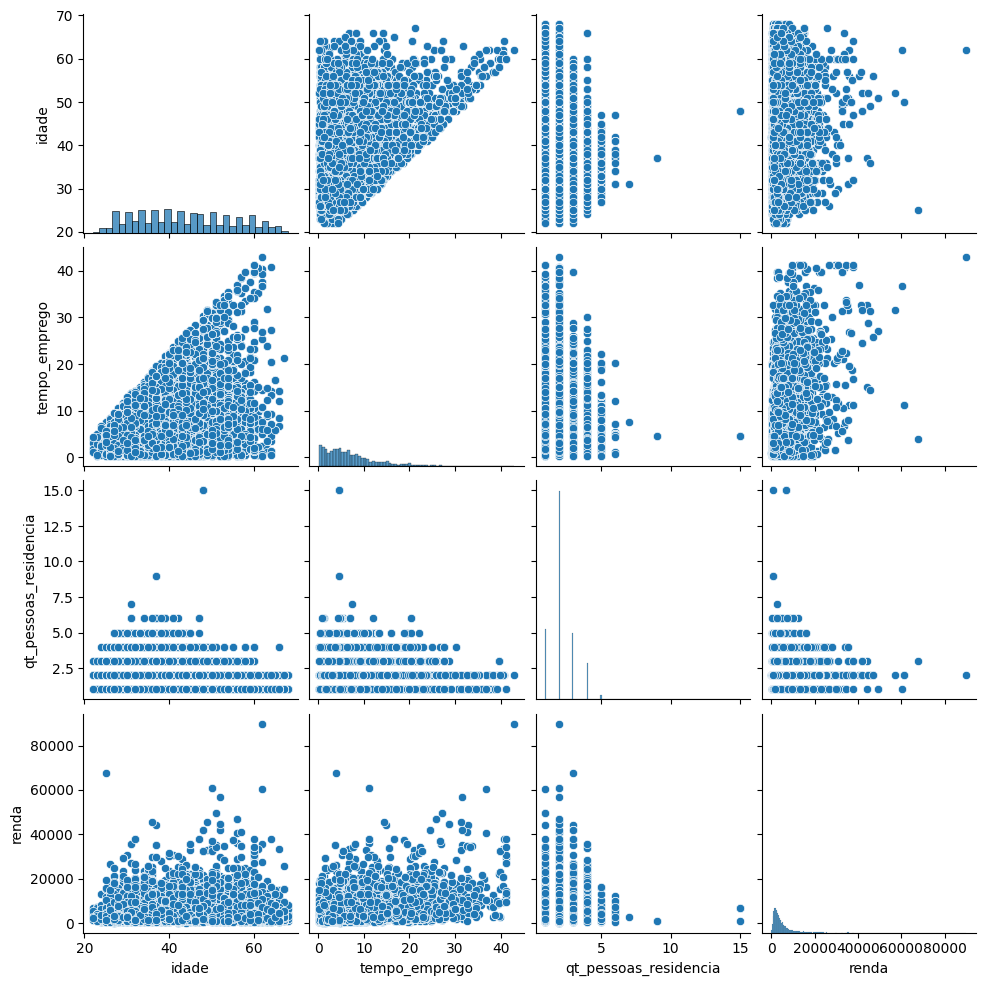

In [5]:
sns.pairplot(renda_num)

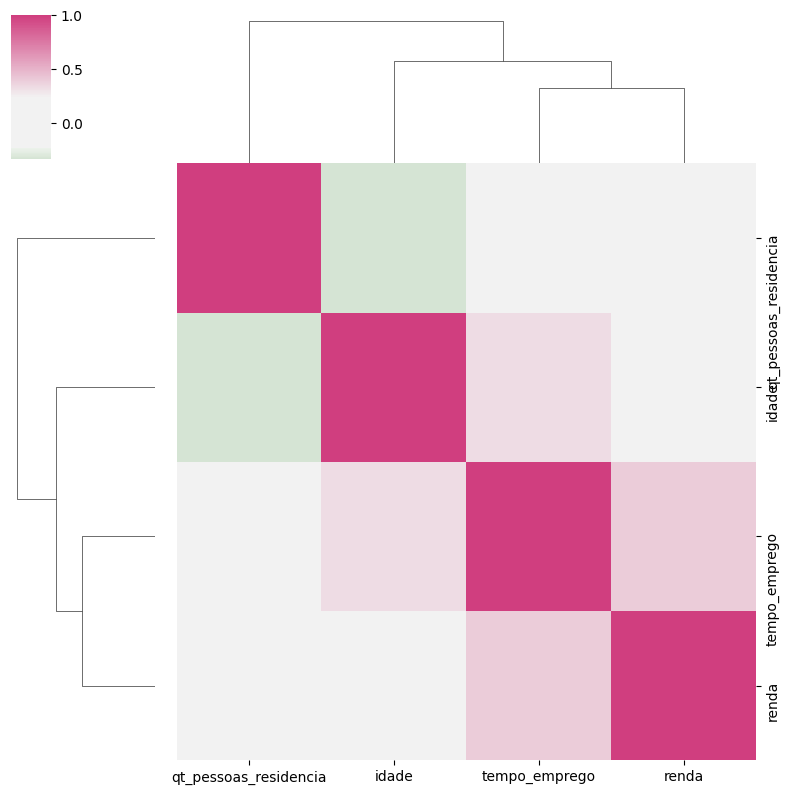

In [6]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(renda_num.corr(), figsize= (8,8), center = 0, cmap = cmap)

In [7]:
renda_num.corr()

,idade,tempo_emprego,qt_pessoas_residencia,renda
idade,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,-0.338805,-0.065748,1.000000,0.020977
renda,0.042570,0.394235,0.020977,1.000000


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

Como demonstrado pela matriz de correlação e pela função corr(), as variaveis com a maior relação com a renda são o tempo de emprego e a idade, ainda assim, a correlação é bastante baixa. 

<Axes: xlabel='tempo_emprego', ylabel='renda'>

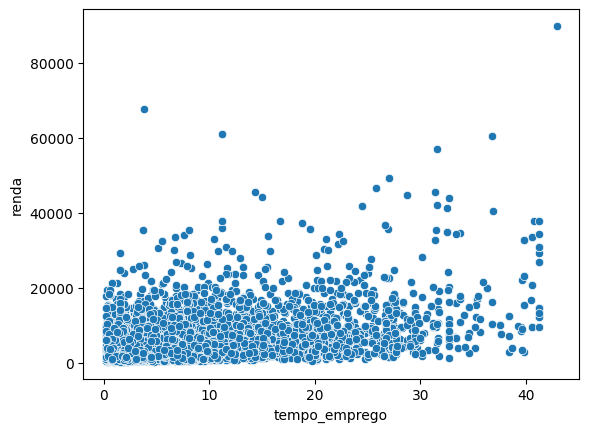

In [8]:
sns.scatterplot(x = 'tempo_emprego', y='renda', data = renda_num)

<Axes: xlabel='idade', ylabel='renda'>

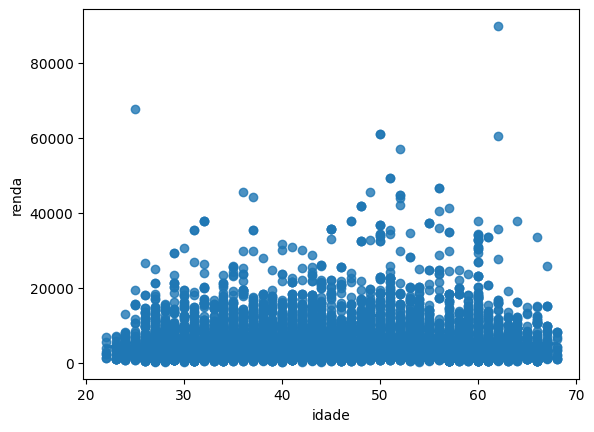

In [9]:
sns.regplot(x = 'idade', y='renda', data = renda_num)

3) Na su aopinião, há outliers na variável renda?

In [10]:
renda_num['renda'].mean()

4624.632946

In [11]:
renda_num['renda'].nlargest(10)

9934     89918.04
113      67794.54
7078     60965.51
9028     60965.51
7765     60475.59
6772     56938.90
10533    49420.10
14341    49420.10
5452     46723.48
14531    46723.48
Name: renda, dtype: float64

Com base nos gráficos de scatterplot, e vendo também que os maiores valores de renda são quase 20 maiores que a média, podemos dizer que a claremente outliers na renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [12]:
renda_num['log_renda'] = np.log(renda_num['renda'])
renda_num

C:\Users\samsun\AppData\Local\Temp\ipykernel_9940\2281359741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_num['log_renda'] = np.log(renda_num['renda'])


,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,36,3.575342,3.0,3369.24,8.122442
1,42,0.860274,2.0,6096.14,8.715411
2,31,8.065753,4.0,5658.98,8.640999
3,50,1.208219,2.0,7246.69,8.888300
4,52,13.873973,2.0,4017.37,8.298383
...,...,...,...,...,...
14995,37,2.046575,3.0,1193.29,7.084469
14996,30,12.079452,3.0,2519.18,7.831689
14997,40,2.161644,2.0,1586.85,7.369506
14998,47,3.295890,2.0,6975.39,8.850144


<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

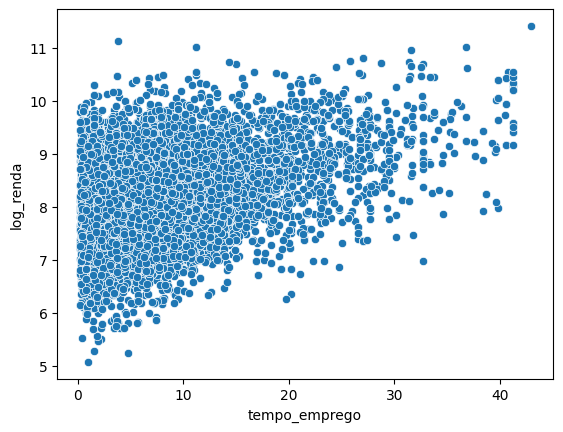

In [13]:
sns.scatterplot(x = 'tempo_emprego', y='log_renda', data = renda_num)

<Axes: xlabel='idade', ylabel='log_renda'>

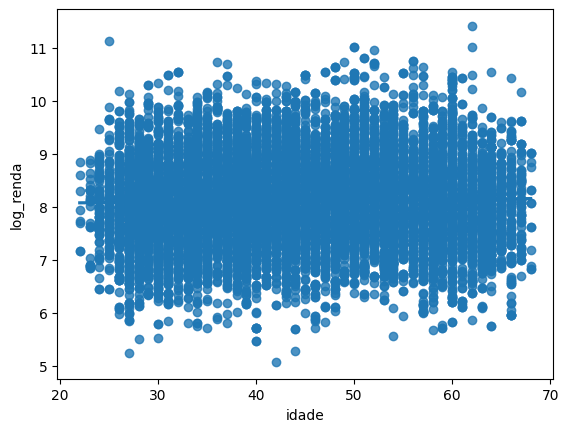

In [14]:
sns.regplot(x = 'idade', y='log_renda', data = renda_num)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Aplicar o log melhora a análise pois torna a coluna mais 'linear', ou seja, o log diminui a distância entre os outliers e o bulk dos dados, mas, ainda assim, a análise deste dataframe específico é bastante difícil, pois a correlação entre a renda e as outras variaveis numéricas é muito baixa (o maior valor é de 0.39).